In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import os

matplotlib.rcParams['figure.figsize'] = [10, 5]
matplotlib.rcParams['figure.dpi'] = 200
sns.set(style='darkgrid')
color = sns.color_palette()

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Always remember that if you have large dataset and you set max rows and max columns, never just write the name of dataframe without .head() while running large data processing step.....the program will run for hours without giving any result.

In [ ]:
aisels = pd.read_csv(r"instacart-market_basket_analysis\aisles.csv")
departments = pd.read_csv(r"instacart-market_basket_analysis\departments.csv")
orders = pd.read_csv(r"instacart-market_basket_analysis\orders.csv")
products = pd.read_csv(r"instacart-market_basket_analysis\products.csv")
order_products_prior = pd.read_csv(r"instacart-market_basket_analysis\order_products__prior.csv")
sample_submission = pd.read_csv(r"instacart-market_basket_analysis\sample_submission.csv")

In [3]:
data = pd.merge(order_products_prior, orders, on='order_id', how='left')
data = pd.merge(data, products, on='product_id', how='left')
data = pd.merge(data, aisels, on='aisle_id', how='left')
data = pd.merge(data, departments, on='department_id', how='left')

data.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [4]:
data.shape

(32434489, 15)

In [5]:
data = data.apply(pd.to_numeric, downcast='integer', errors='ignore')
data = data.apply(pd.to_numeric, downcast='float', errors='ignore')

In [6]:
data['user_id'].nunique()

206209

In [7]:
data.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [51]:
cross_df = pd.crosstab(data['user_id'], data['aisle']) 
cross_df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [9]:
pivot = pd.crosstab(data['user_id'], data['aisle'],normalize='index') # instead of normalize function present in crosstab, we can use df= table_data.div(table_data.sum(axis = 1), axis = 0)
pivot.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.016949,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.016949
2,0.0,0.015385,0.0,0.0,0.0,0.0,0.010256,0.0,0.0,0.0,...,0.015385,0.005128,0.005128,0.000000,0.0,0.0,0.0,0.010256,0.0,0.215385
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.045455,0.011364,0.000000,0.000000,0.0,0.0,0.0,0.022727,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.055556,0.0,0.0,0.0,0.055556,0.0,0.000000
5,0.0,0.054054,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.081081


Principal Component Analysis and K-Means

In [12]:
pca = PCA(n_components=15)
df_pca = pca.fit_transform(pivot)
X = pd.DataFrame(df_pca)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.113442,0.039085,-0.042856,0.018902,-0.088487,-0.104322,-0.115910,0.083649,-0.063577,-0.023800,-0.020578,-0.012923,-0.063341,0.044734,0.061912
1,-0.036988,0.108885,-0.066407,-0.123278,0.098857,-0.033985,-0.054781,-0.053342,-0.020258,-0.008046,0.019164,-0.033825,0.054319,0.016388,-0.001595
2,0.064282,0.103963,0.000714,-0.012229,-0.046980,0.112269,-0.029944,0.007832,0.012322,0.002028,-0.007952,0.086451,-0.043007,0.088609,0.018913
3,-0.093210,0.054096,0.001872,-0.004009,-0.071279,-0.019258,-0.025151,-0.038494,0.005797,-0.001187,-0.057931,-0.055816,0.128057,0.031926,-0.037686
4,0.094629,-0.037051,-0.024952,-0.021589,0.055382,0.107670,-0.008160,0.103919,0.051751,-0.026277,0.035638,-0.011562,0.006875,-0.007708,-0.002228


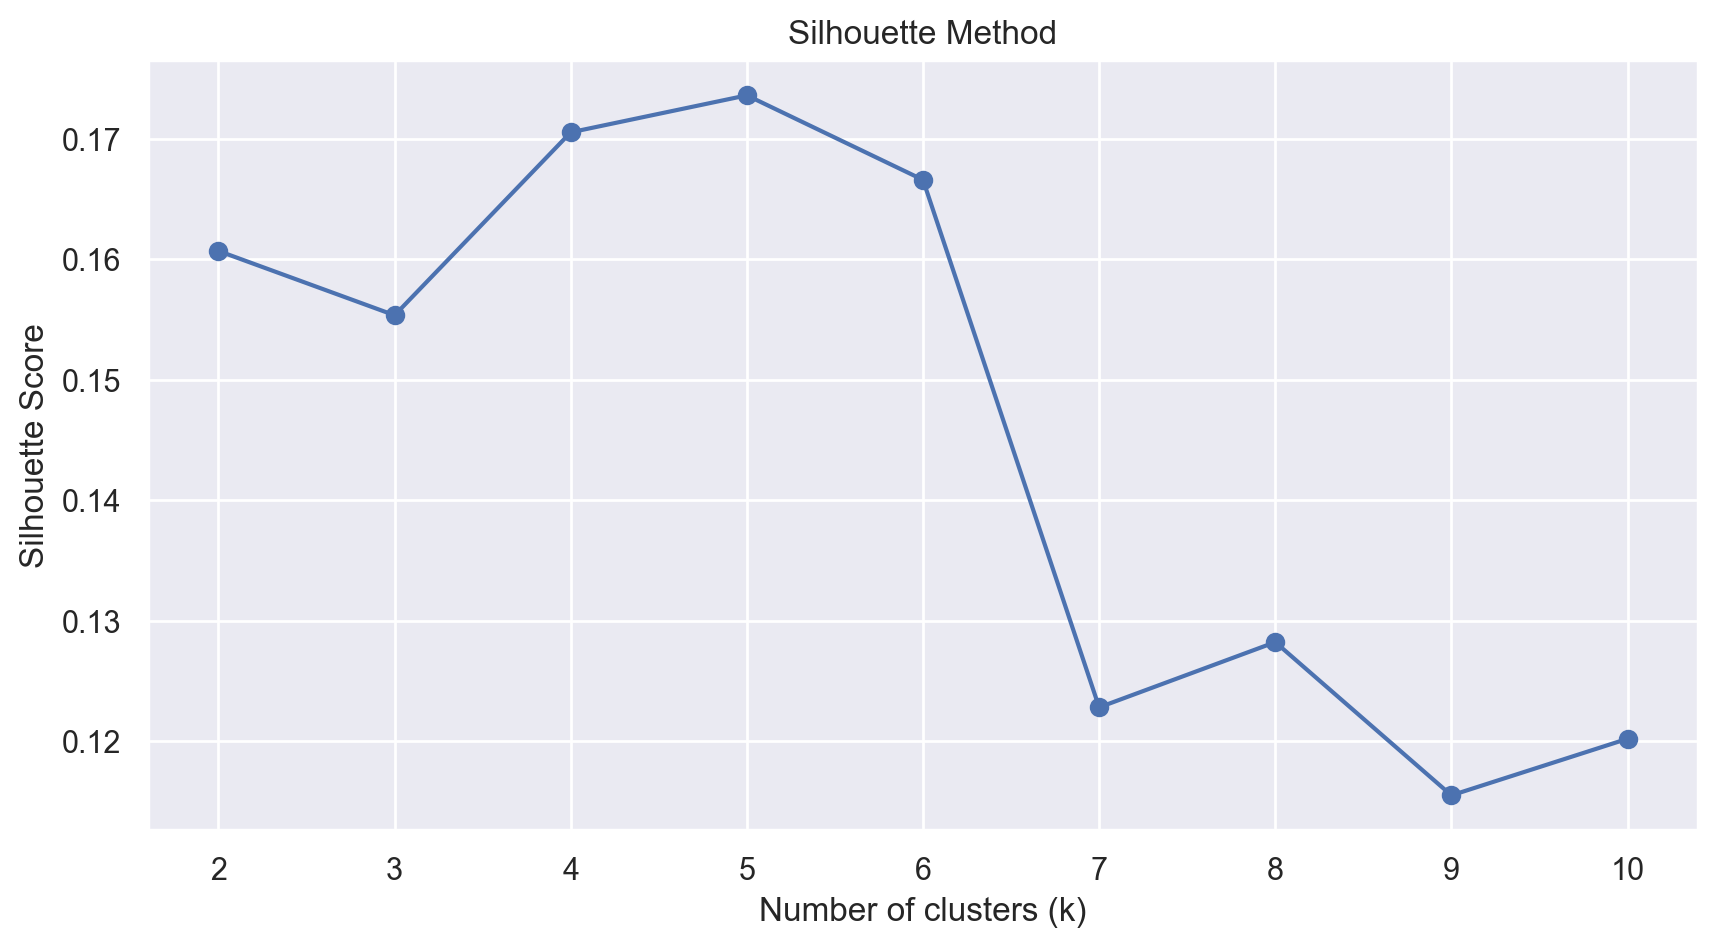

In [13]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # Start from 2 because silhouette is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot the Silhouette Score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


Consider the highest Silhouette Scores

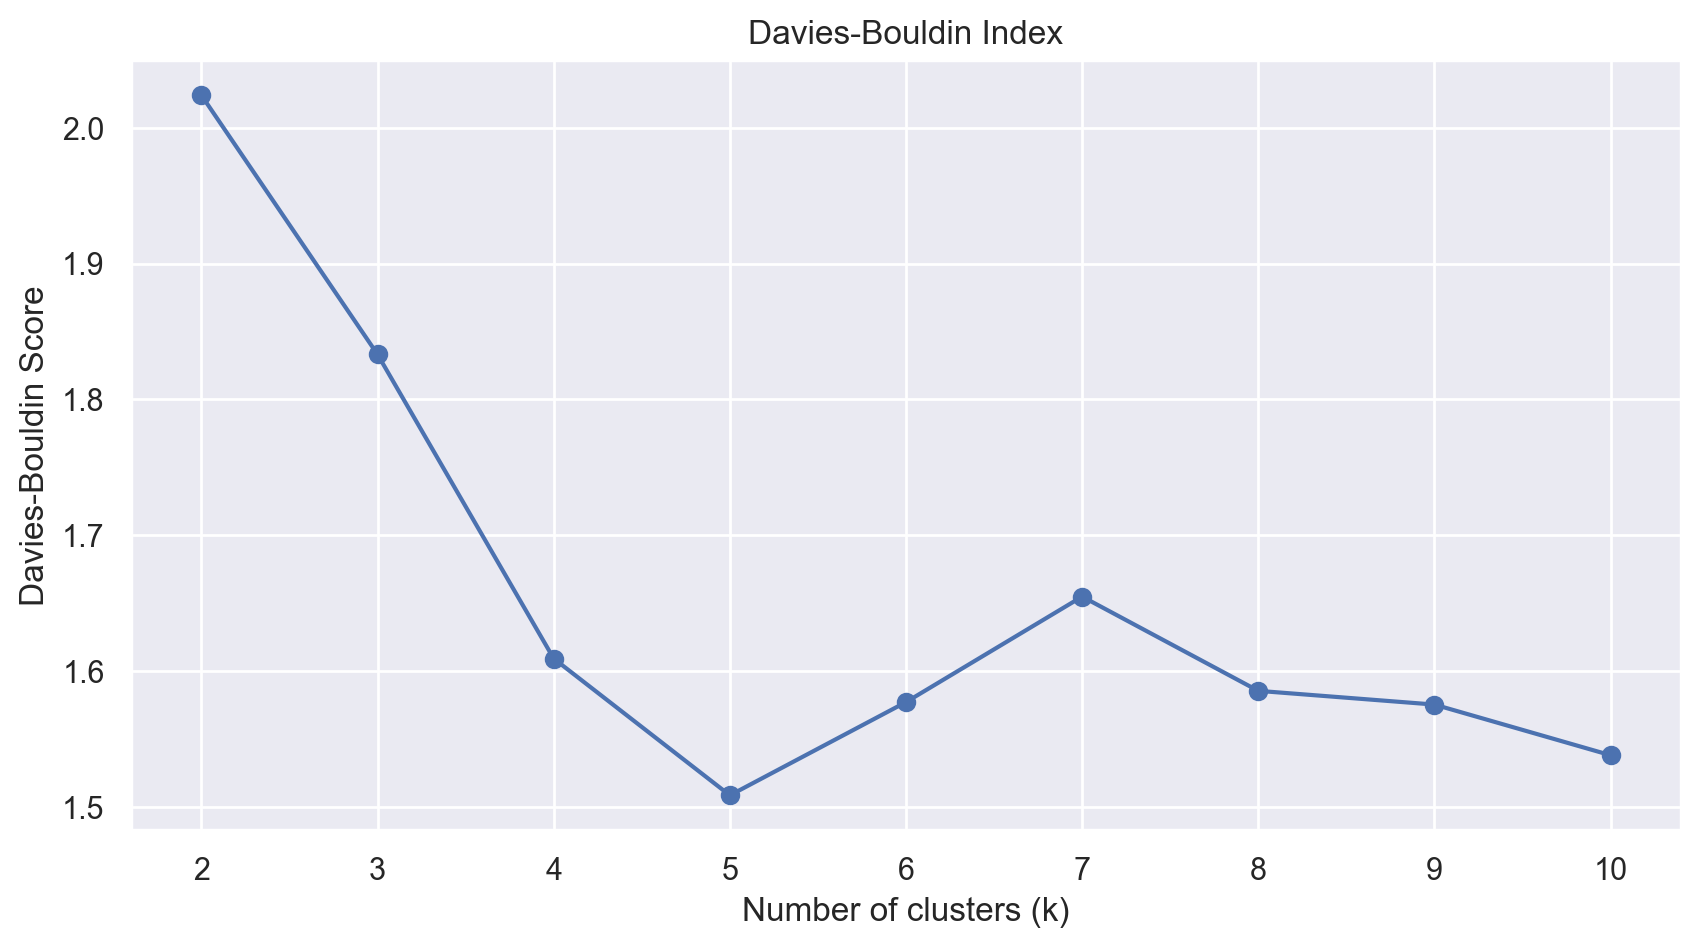

In [18]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = davies_bouldin_score(X, labels)
    davies_bouldin_scores.append(score)

# Plot the Davies-Bouldin Index
plt.plot(range(2, 11), davies_bouldin_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Index')
plt.show()


Consider the lowest Davies-Bouldin Score

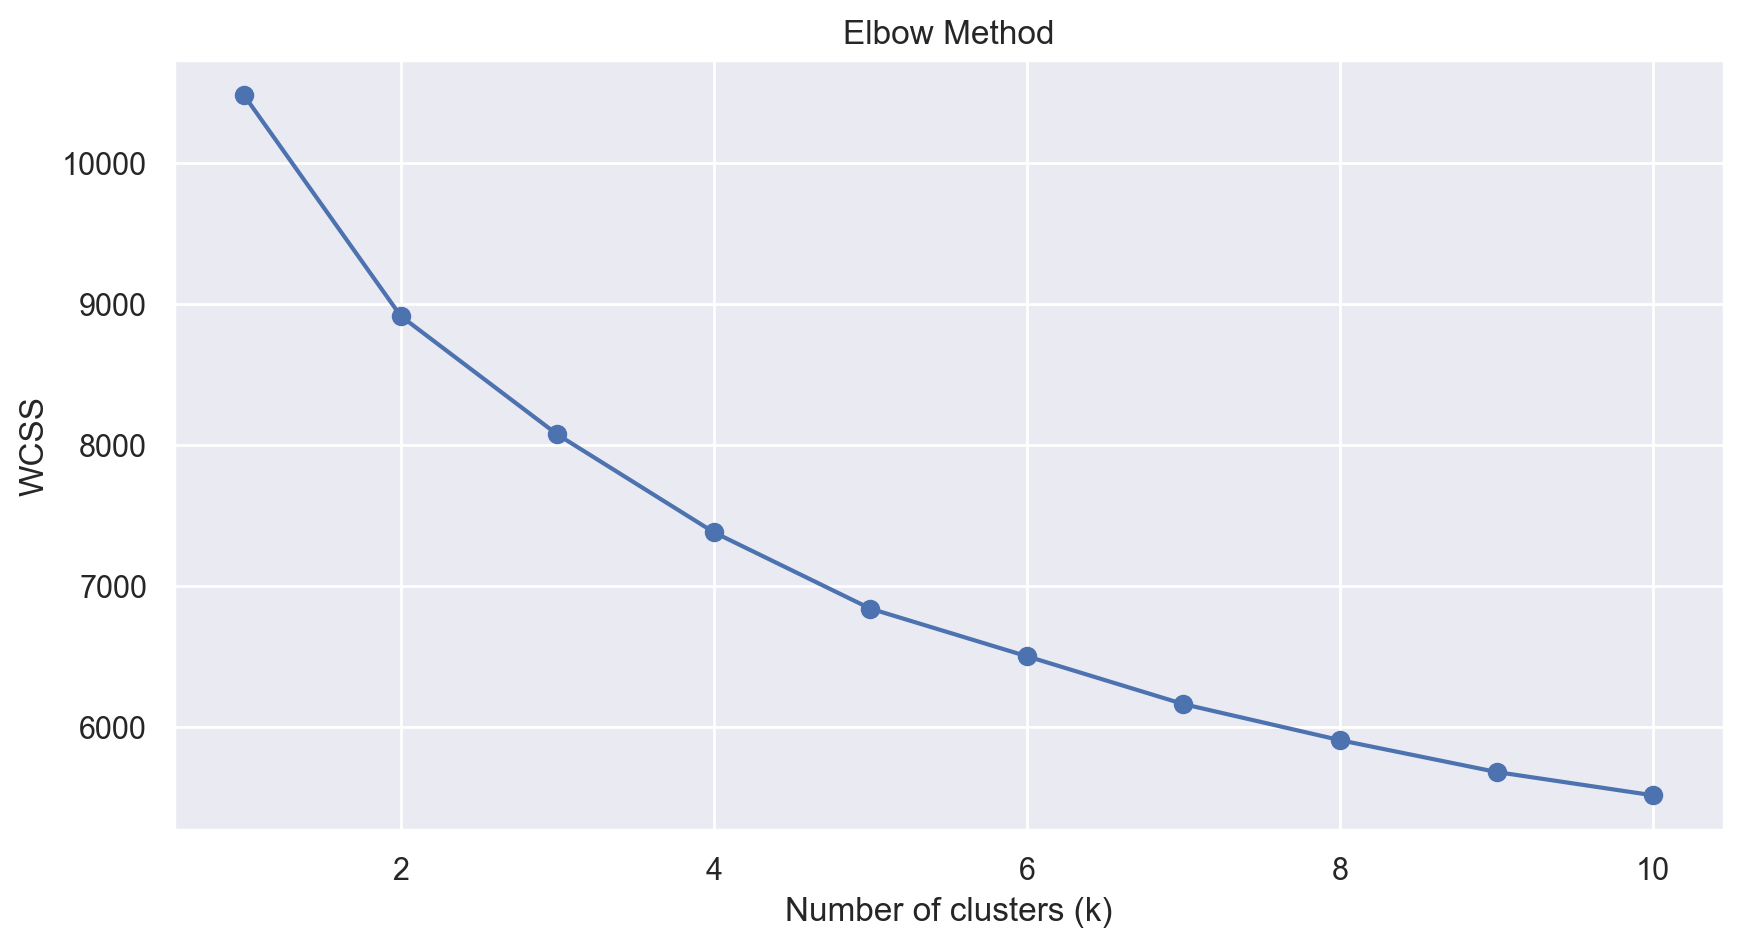

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Compute WCSS for different values of k
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is WCSS

# Plot the Elbow Curve
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


Means here the model is getting overfitted and no conclusion

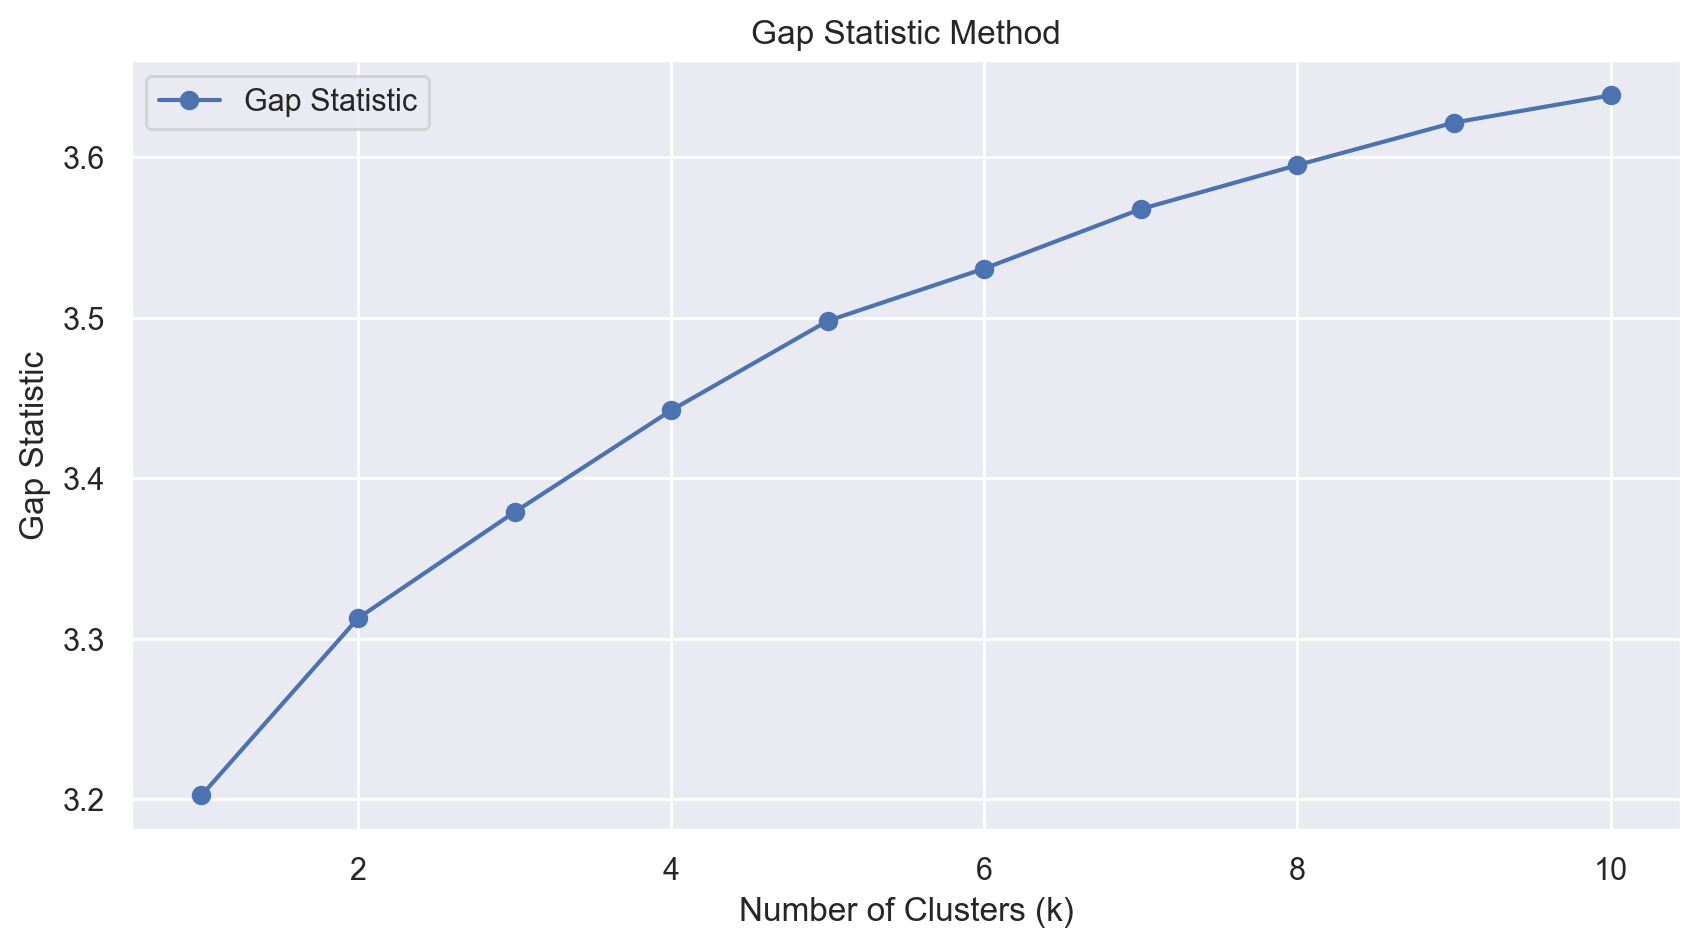

In [20]:
from sklearn.cluster import KMeans
import numpy as np

def gap_statistic(X, k_range=range(1, 11), B=10):
    wcss = []
    ref_wcss = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
        wcss.append(kmeans.inertia_)

        ref_inertia = []
        for _ in range(B):  # Generate B random reference datasets
            X_random = np.random.random_sample(size=X.shape)
            kmeans_random = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_random)
            ref_inertia.append(kmeans_random.inertia_)

        ref_wcss.append(np.mean(ref_inertia))

    gaps = np.log(ref_wcss) - np.log(wcss)

    plt.plot(k_range, gaps, marker='o', label='Gap Statistic')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Gap Statistic')
    plt.title('Gap Statistic Method')
    plt.legend()
    plt.show()

gap_statistic(X)


According to Gap Statistics increasing trend means clustering is improving and we need to find a point where the increase starts to slow down.

In [48]:
clusterer = KMeans(n_clusters=5,random_state=42).fit(X)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(X)
print(centers)

[[ 1.05557121e-01 -7.30411740e-02  1.72329130e-02  3.66062037e-03
   1.76753897e-03 -4.40474782e-03 -9.56677423e-04  1.30988317e-03
  -1.72483099e-04  8.01967507e-04  1.28690624e-03  1.09675003e-03
   7.17022084e-04  4.38003207e-04  1.05581970e-03]
 [-1.98172899e-01  1.61027398e-02  3.16572804e-01 -3.12987119e-02
   1.84673457e-02  3.52194700e-04  3.78716505e-03  1.12002208e-02
   1.25414484e-03 -3.73423766e-03 -2.06253803e-03 -1.21239898e-03
  -4.40334000e-04  2.83069531e-03  4.90312177e-04]
 [ 6.76465846e-02  1.06019467e-01 -1.08484833e-03 -3.09182350e-02
  -1.07920777e-02  7.19528306e-03 -5.22577212e-04  4.47133579e-03
  -7.27444054e-04 -1.43088062e-04 -7.40992209e-04  3.36276482e-05
  -1.44100814e-03  6.59269402e-04 -2.03143800e-04]
 [-6.11487969e-03  1.30724847e-01  4.82685248e-03  2.30230524e-01
   1.10210987e-01 -2.28724168e-02  1.71986287e-04 -6.45156131e-03
   7.81667612e-03  2.96803461e-03  1.13785710e-03 -2.08945840e-03
   1.02575152e-03  3.84356807e-03  1.42271966e-03]
 [-7

In [49]:
temp_df = X.iloc[:, 0:2]
temp_df.columns = ["pc1", "pc2"]
temp_df['cluster'] = c_preds
temp_df.head()

C:\Users\Atharva Bhattad\AppData\Local\Temp\ipykernel_24424\3808474746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['cluster'] = c_preds


,pc1,pc2,cluster
0,-0.113442,0.039085,4
1,-0.036988,0.108885,2
2,0.064282,0.103963,2
3,-0.093210,0.054096,4
4,0.094629,-0.037051,0


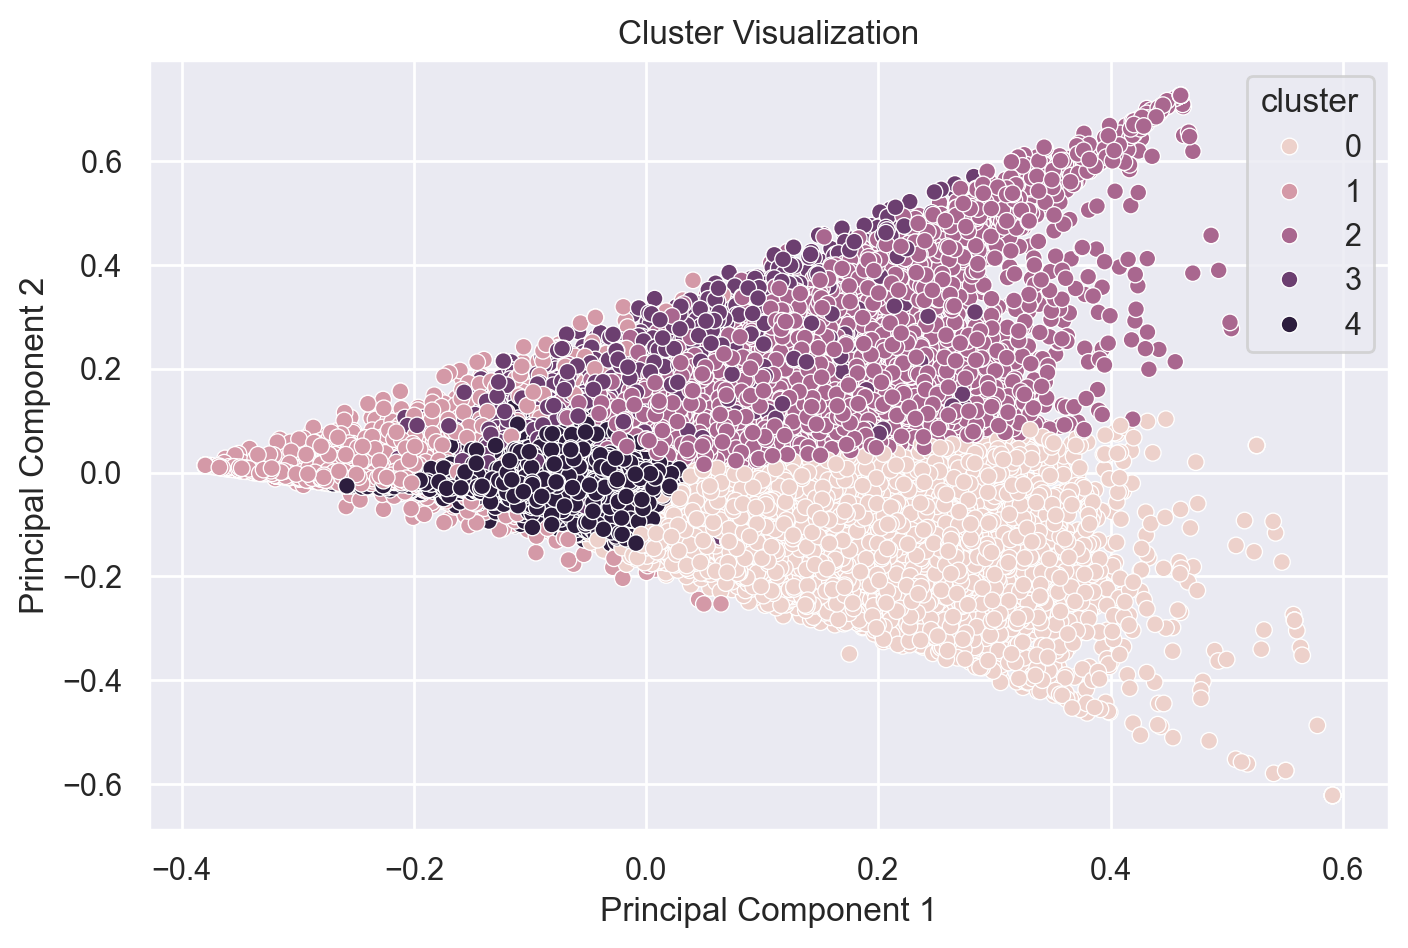

In [50]:
fig, ax = plt.subplots(figsize = (8, 5))
ax = sns.scatterplot(data = temp_df, x = "pc1", y = "pc2", hue = "cluster")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("Cluster Visualization")
plt.show();

GMM

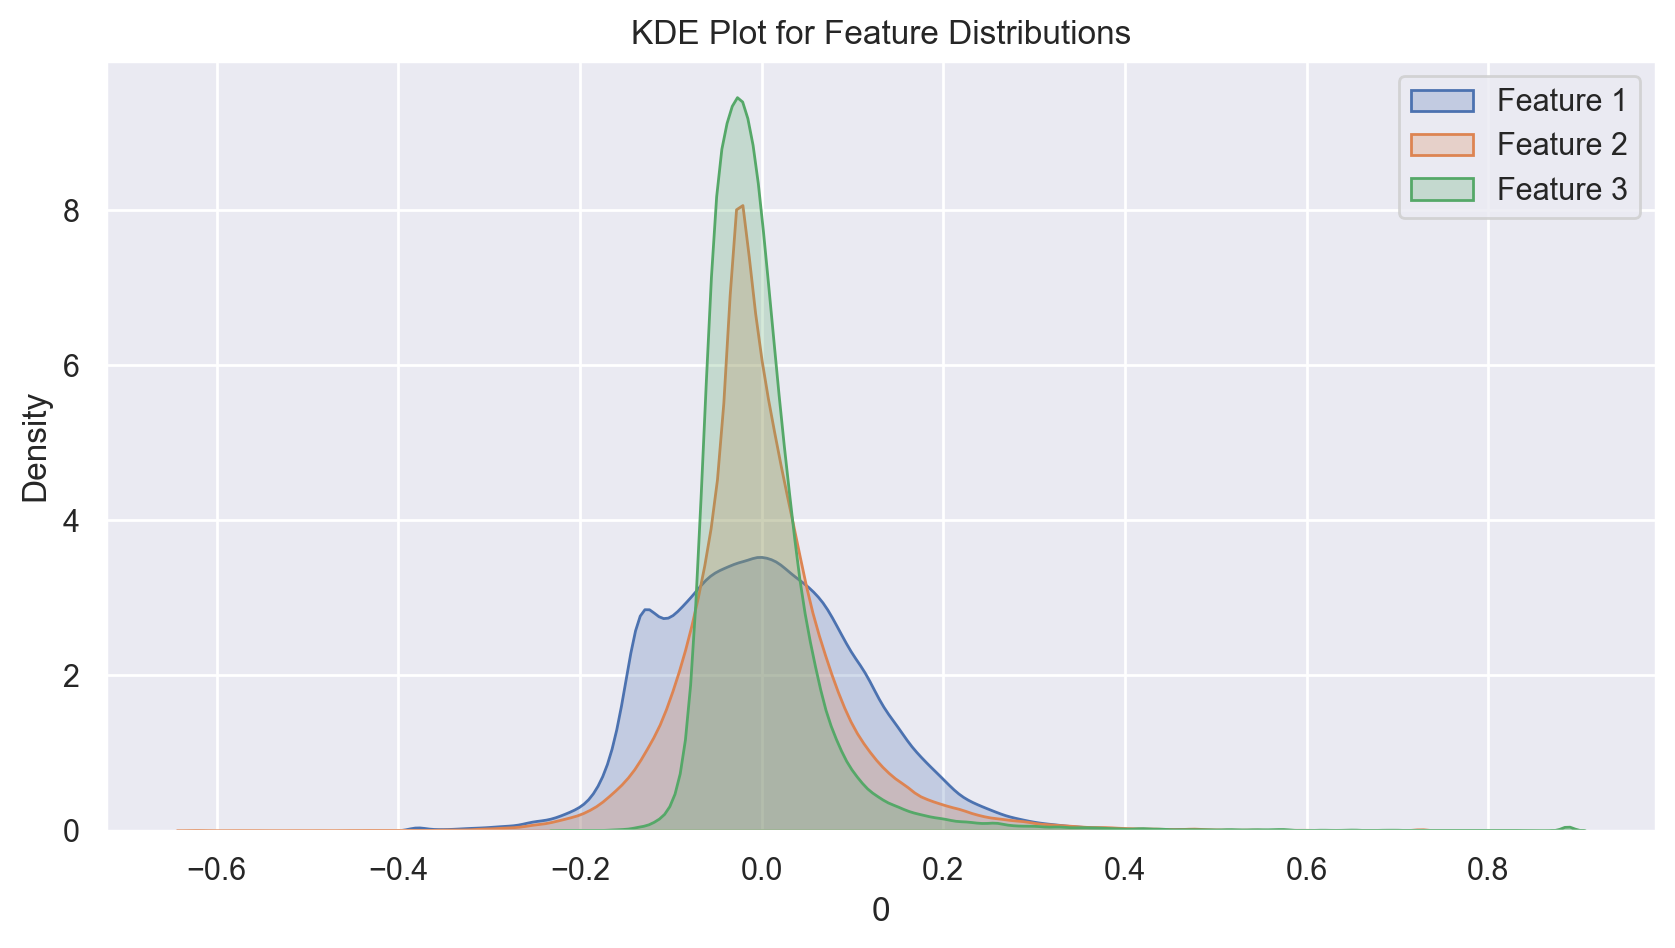

In [39]:
import seaborn as sns

sns.kdeplot(X.iloc[:, 0], label="Feature 1", fill=True)
sns.kdeplot(X.iloc[:, 1], label="Feature 2", fill=True)
sns.kdeplot(X.iloc[:, 2], label="Feature 3", fill=True)
# sns.kdeplot(X_transformed[:, 0], label="Feature 3", fill=True)


plt.legend()
plt.title("KDE Plot for Feature Distributions")
plt.show()


GMM with power transformation for skewed and dual peak distribution

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Apply power transformation to make data more Gaussian-like
pt = PowerTransformer()
X_transformed = pt.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)


C:\Users\Atharva Bhattad\AppData\Local\Temp\ipykernel_24424\1718797150.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['cluster'] = labels_gmm


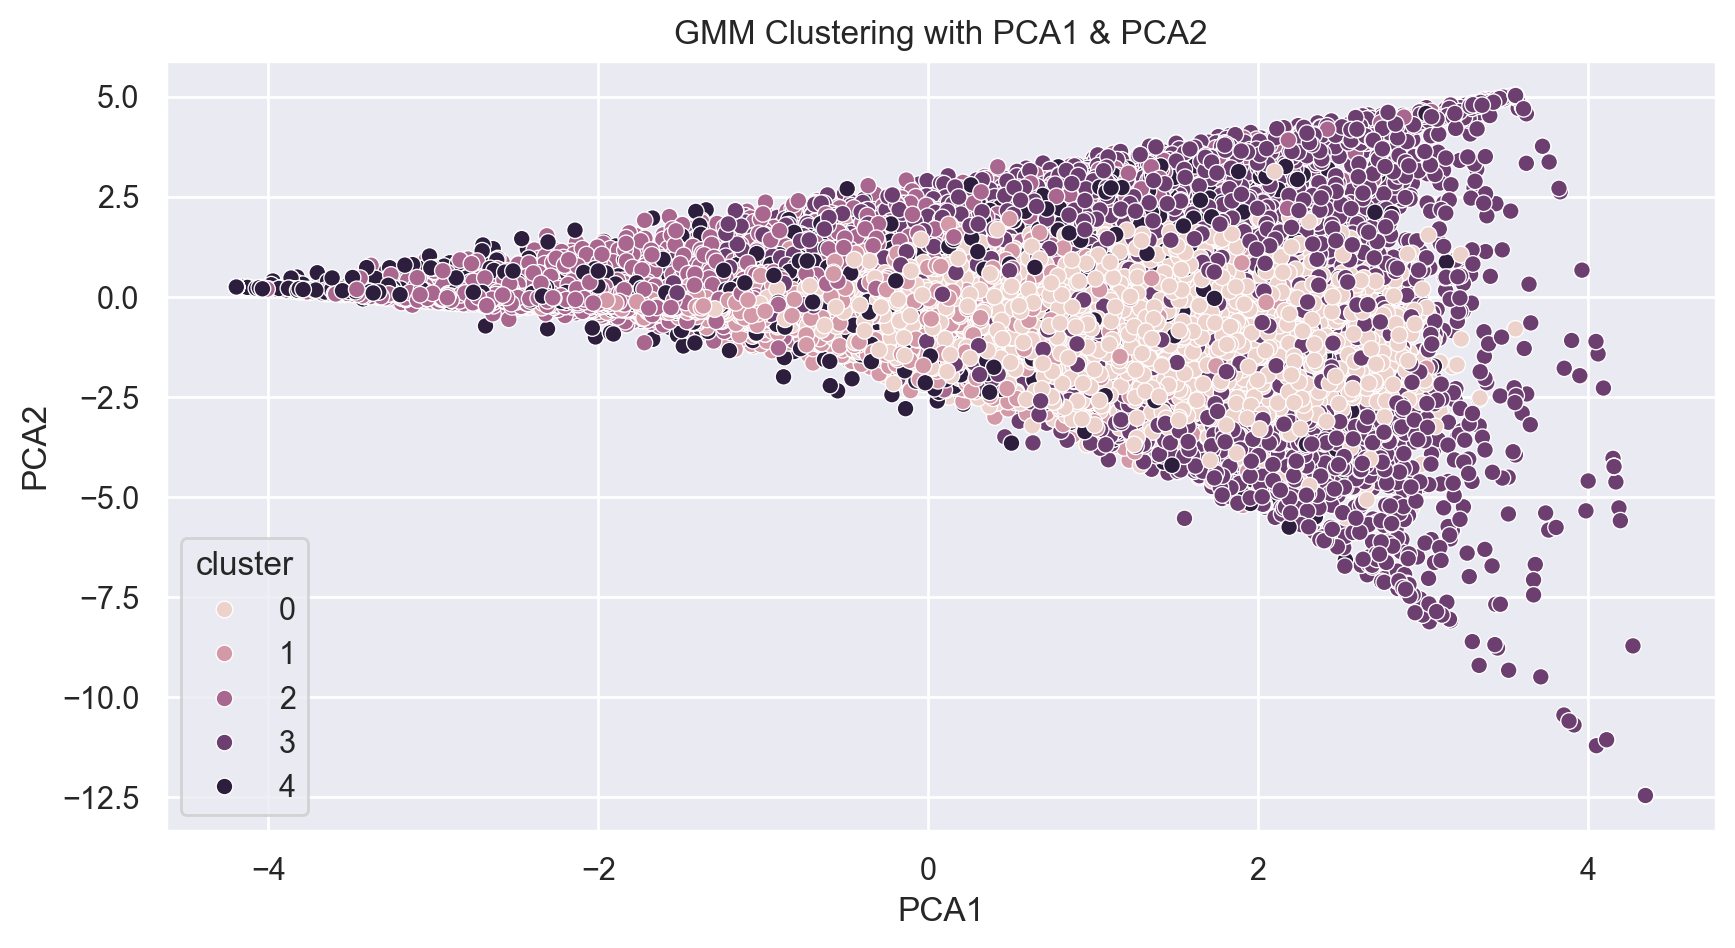

In [46]:
from sklearn.mixture import GaussianMixture

# Fit GMM
gmm = GaussianMixture(n_components=5, random_state=42)
labels_gmm = gmm.fit_predict(X_transformed)
temp_df = X_transformed.iloc[:, 0:2]
temp_df.columns = ["pc1", "pc2"]
temp_df['cluster'] = labels_gmm
temp_df.head()

ax = sns.scatterplot(data = temp_df, x = "pc1", y = "pc2", hue = "cluster")

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("GMM Clustering with PCA1 & PCA2")
plt.show()


GMM without data modification  

C:\Users\Atharva Bhattad\AppData\Local\Temp\ipykernel_24424\3325909141.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['cluster'] = labels_gmm


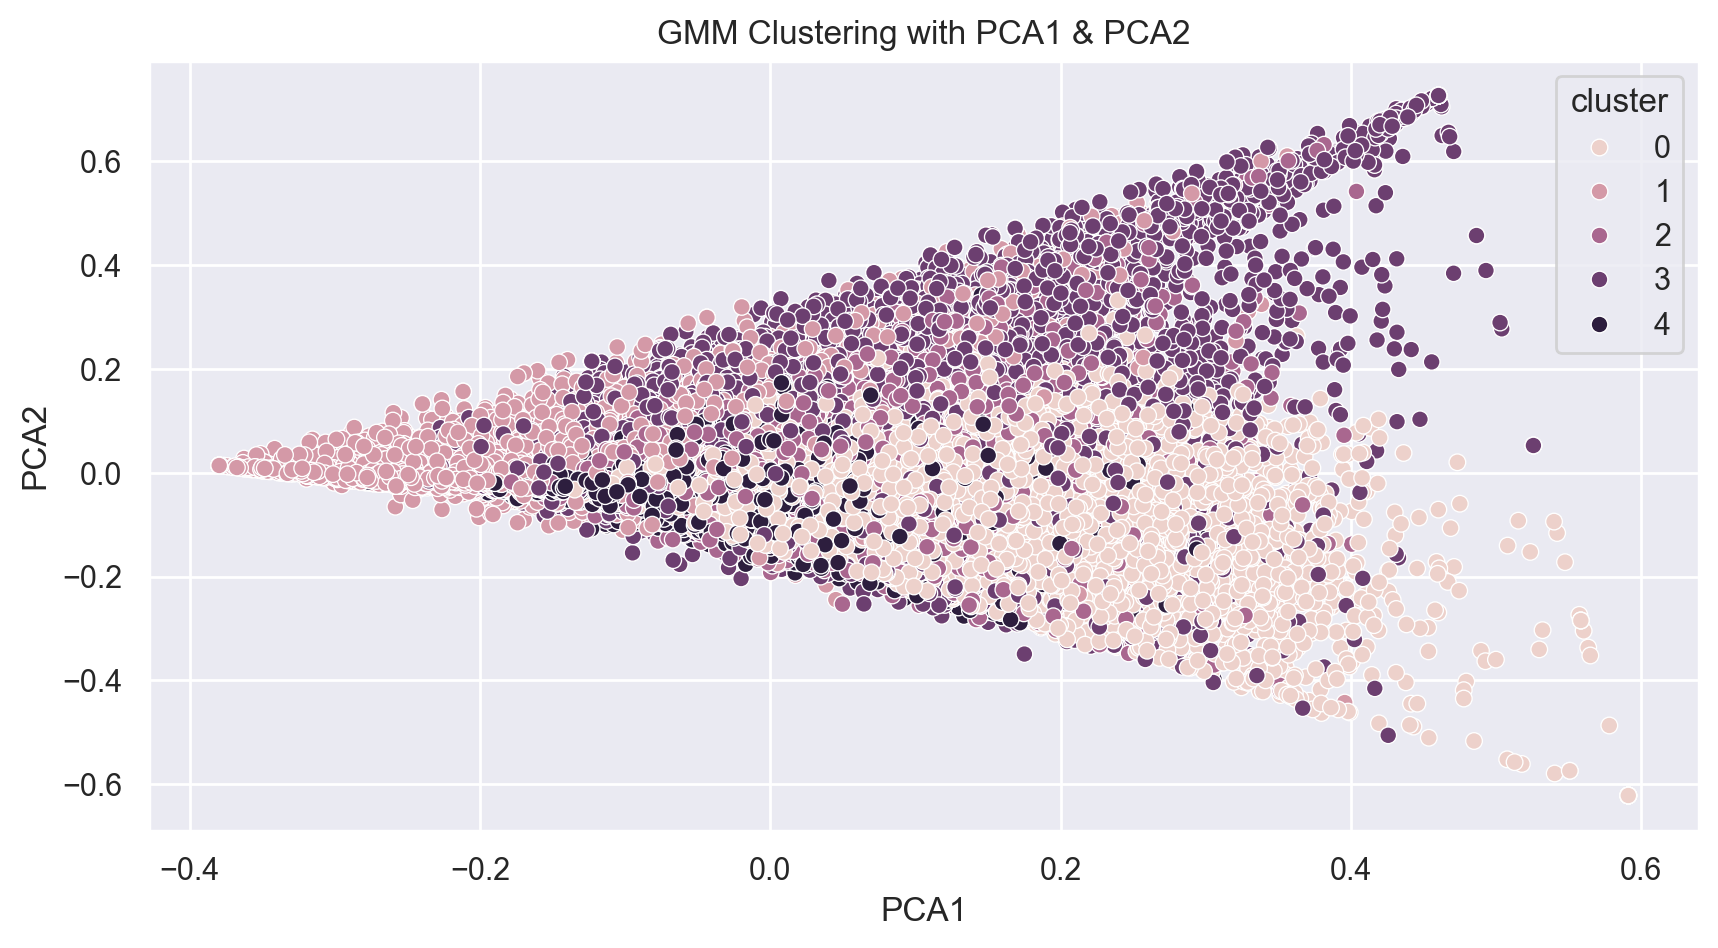

In [47]:
from sklearn.mixture import GaussianMixture

# Fit GMM
gmm = GaussianMixture(n_components=5, random_state=42)
labels_gmm = gmm.fit_predict(X)
temp_df = X.iloc[:, 0:2]
temp_df.columns = ["pc1", "pc2"]
temp_df['cluster'] = labels_gmm
temp_df.head()

ax = sns.scatterplot(data = temp_df, x = "pc1", y = "pc2", hue = "cluster")

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("GMM Clustering with PCA1 & PCA2")
plt.show()


According to visual results we go with the KMeans results

In [52]:
cross_df['cluster'] = c_preds

cluster1 = cross_df[cross_df.cluster == 0]
cluster2 = cross_df[cross_df.cluster == 1]
cluster3 = cross_df[cross_df.cluster == 2]
cluster4 = cross_df[cross_df.cluster == 3]
cluster5 = cross_df[cross_df.cluster == 4]

In [62]:
print(cluster1.shape)
cluster1.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]


(55831, 135)


aisle
fresh vegetables                 37.051065
fresh fruits                     21.764557
packaged vegetables fruits       12.037452
yogurt                            6.164067
packaged cheese                   5.015995
fresh herbs                       4.151117
milk                              4.006627
soy lactosefree                   3.718006
frozen produce                    3.301141
water seltzer sparkling water     3.080045
dtype: float64

In [63]:
print(cluster2.shape)
cluster2.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

(5425, 135)


aisle
water seltzer sparkling water    20.944147
fresh fruits                      3.334194
soft drinks                       2.824147
yogurt                            2.242581
energy granola bars               1.557604
chips pretzels                    1.339355
milk                              1.335853
tea                               1.330507
packaged vegetables fruits        1.250876
soy lactosefree                   1.092719
dtype: float64

In [64]:
print(cluster3.shape)
cluster3.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

(37837, 135)


aisle
fresh fruits                     35.739937
fresh vegetables                 15.008722
packaged vegetables fruits       12.081613
yogurt                            9.872823
milk                              5.948146
packaged cheese                   5.116923
soy lactosefree                   3.781034
water seltzer sparkling water     3.611703
bread                             3.193964
chips pretzels                    3.118403
dtype: float64

In [65]:
print(cluster4.shape)
cluster4.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

(7945, 135)


aisle
packaged produce                 18.360856
fresh fruits                     10.874638
packaged vegetables fruits        4.236249
fresh vegetables                  3.106734
water seltzer sparkling water     1.716300
milk                              1.619383
packaged cheese                   1.557583
frozen produce                    1.144619
chips pretzels                    1.144242
nuts seeds dried fruit            1.031089
dtype: float64

In [66]:
print(cluster5.shape)
cluster5.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]


(99171, 135)


aisle
fresh fruits                     9.783828
fresh vegetables                 7.579655
yogurt                           7.227446
packaged vegetables fruits       6.006544
packaged cheese                  4.931623
chips pretzels                   4.482450
milk                             4.256769
water seltzer sparkling water    4.090480
refrigerated                     3.258493
ice cream ice                    3.098073
dtype: float64

Results of Segmentation

- Cluster 1 results into 5428 consumers having a very strong preference for water seltzer sparkling water aisle.
- Cluster 2 results into 55784 consumers who mostly order fresh vegetables followed by fruits.
- Cluster 3 results into 7948 consumers who buy packaged produce and fresh fruits mostly.
- Cluster 4 results into 37949 consumers who have a very strong preference for fruits followed by fresh vegetables.
- Cluster 5 results into 99100 consumers who orders products from many aisles. Their mean orders are low compared to other clusters which tells us that either they are not frequent users of Instacart or they are new users and do not have many orders yet. 